In [86]:
import pandas as pd

# Load the data from the csv into a dataframe
df = pd.read_csv('word_embeddings.csv')
# Drop unnecessary column
df.drop('Unnamed: 0', axis='columns', inplace=True)

# Ignore this (read_csv thinks the embeddings are strings and not arrays, this fixes that)
df['embedding'] = df['embedding'].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep = ' '))

In [87]:
# These are the words we want to test our model with - feel free to change these!
blacklist = ['nice', 'mean', 'bad', 'good', 'sad', 'happy', 'fantastic', 'terrible']

In [88]:
# This is the data we are testing our model on (contains words in blacklist)
test_df = df[df['word'].str.lower().str.strip().isin(blacklist)].copy()
test_df.head()

,word,embedding,score
16,good,"[0.04052734, 0.0625, -0.01745605, 0.07861328, ...",0.500
106,bad,"[0.06298828, 0.12451172, 0.11328125, 0.0732421...",-0.875
164,happy,"[-0.000518798828, 0.16015625, 0.00160980225, 0...",0.875
649,Good,"[-0.108886719, -0.0747070312, -0.0454101562, -...",0.500
717,fantastic,"[-0.122558594, -0.0378417969, -0.124023438, 0....",0.375


In [89]:
# This is the data we are training our model on (words NOT in blacklist)
train_df = df[~df['word'].str.lower().str.strip().isin(blacklist)].copy()
train_df.head()

,word,embedding,score
0,is,"[0.00704956, -0.07324219, 0.171875, 0.02258301...",0.125
1,not,"[0.08496094, -0.09521484, 0.11914062, 0.111816...",-0.625
2,will,"[0.04882812, 0.16699219, 0.16894531, 0.0874023...",0.125
3,an,"[0.12597656, 0.19042969, 0.06982422, 0.0722656...",-0.125
4,had,"[-0.0581054688, 0.0581054688, 0.0133056641, -0...",0.250


In [90]:
# Ensures input to LinearRegression model is in acceptable format
X_train = np.array(list(train_df['embedding'].values))
Y_train = np.array(list(train_df['score'].values))

X_test = np.array(list(test_df['embedding'].values))
Y_test = np.array(list(test_df['score'].values))

In [91]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()

classifier.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
print("Score:", classifier.score(X_test, Y_test))

Score: 0.5823369832683984


In [103]:
# Here's an example of output from the model - 'happy' should have a higher sentiment score than 'sad'
print(classifier.predict([np.array(model['happy'])])[0])
print(classifier.predict([np.array(model['sad'])])[0])

0.2781920829496875
-0.2376161619385116


In [94]:
# This gets the shape of coefficients of the LinearRegression model, which we can see is the same
# as the length of the embedding input
classifier.coef_.shape

(300,)

In [95]:
# This is the intercept of the LinearRegression model
classifier.intercept_

0.05965738943488662

In [99]:
test_df['predicted_score'] = test_df['embedding'].apply(lambda x: classifier.predict(x.reshape(1, -1))[0])

In [100]:
test_df.head()

,word,embedding,score,predicted_score
16,good,"[0.04052734, 0.0625, -0.01745605, 0.07861328, ...",0.500,0.160842
106,bad,"[0.06298828, 0.12451172, 0.11328125, 0.0732421...",-0.875,-0.370561
164,happy,"[-0.000518798828, 0.16015625, 0.00160980225, 0...",0.875,0.278192
649,Good,"[-0.108886719, -0.0747070312, -0.0454101562, -...",0.500,0.204315
717,fantastic,"[-0.122558594, -0.0378417969, -0.124023438, 0....",0.375,0.186539


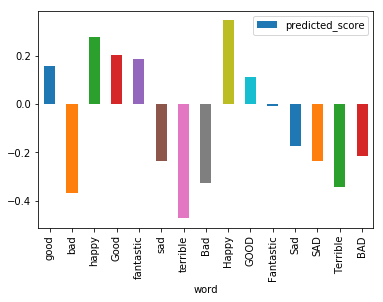

In [101]:
# A bar plot showing what our model thinks the sentiments of our test words are
test_df.plot(x='word',y='predicted_score',kind='bar')

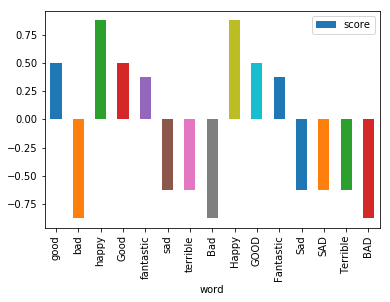

In [102]:
# Here's what they actually are - should look similar to previous plot!
test_df.plot(x='word',y='score',kind='bar')